<h1>Deaths Caused by Risk Factors (1990-2017)</h1>

Risk factors data source: https://www.kaggle.com/varpit94/worldwide-deaths-by-risk-factors
<br>
Countries' populations data source: https://data.worldbank.org/indicator/SP.POP.TOTL
<br>
<br>
The dataset is comprised of the total annual deaths in 231 entities and countries that are caused by risks factors from the years 1990-2017. The Kaggle user downloaded the data from the WHO website. One last note is that the death counts are in decimals because they are actually estimates made by WHO.
<br>
<br>
Risk factors include: Unsafe water source, unsafe sanitation, no access to handwashing facility ,household air pollution from solid fuels, non-exclusive breastfeeding, discontinued breastfeeding, child wasting', child stunting, low birth weight for gestation, secondhand smoke, alcohol use, drug use, diet low in fruits, diet low in vegetables, unsafe sex, low physical activity, high fasting plasma glucose, high body-mass index, high systolic blood pressure, smoking, iron deficiency, vitamin A deficiency , low bone mineral density, air pollution, outdoor air pollution, diet high in sodium, diet low in whole grains, and diet low in nuts and seeds.

In [1]:
# Import some libraries (numpy might not be used)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# load in the datasets
data = pd.read_csv('number-of-deaths-by-risk-factor.csv')
pop = pd.read_csv('CountryPop.csv', header=2)

In [3]:
# First 5 of rows of the datasets
data.head()

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Afghanistan,1990,7554.049543,5887.747628,5412.314513,22388.49723,3221.138842,156.097553,22778.84925,10408.43885,...,28183.98335,6393.667372,726.431294,9344.131952,374.844056,26598.00673,4383.83,2737.197934,11381.37735,7299.867330
1,Afghanistan,1991,7359.676749,5732.770160,5287.891103,22128.75821,3150.559597,151.539851,22292.69111,10271.97643,...,28435.39751,6429.253320,739.245799,9330.182378,379.854237,26379.53222,4426.36,2741.184956,11487.83239,7386.764303
2,Afghanistan,1992,7650.437822,5954.804987,5506.657363,22873.76879,3331.349048,156.609194,23102.19794,10618.87978,...,29173.61120,6561.054957,873.485341,9769.844533,388.130434,27263.12791,4568.91,2798.560245,11866.23557,7640.628526
3,Afghanistan,1993,10270.731380,7986.736613,7104.620351,25599.75628,4477.006100,206.834451,27902.66996,12260.09384,...,30074.76091,6731.972560,1040.047422,11433.769490,405.577931,30495.56150,5080.29,2853.301679,12335.96168,7968.311853
4,Afghanistan,1994,11409.177110,8863.010065,8051.515953,28013.16720,5102.622054,233.930571,32929.00593,14197.94796,...,30809.49117,6889.328118,1101.764645,12936.955860,415.349195,33323.16140,5499.23,2880.025765,12672.95019,8244.368430


In [4]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


<h3>Data Cleaning & Pre-processing</h3>

In [5]:
# Checking for missing values and data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    6468 non-null   object 
 1   Year                                      6468 non-null   int64  
 2   Unsafe water source                       6468 non-null   float64
 3   Unsafe sanitation                         6468 non-null   float64
 4   No access to handwashing facility         6468 non-null   float64
 5   Household air pollution from solid fuels  6468 non-null   float64
 6   Non-exclusive breastfeeding               6468 non-null   float64
 7   Discontinued breastfeeding                6468 non-null   float64
 8   Child wasting                             6468 non-null   float64
 9   Child stunting                            6468 non-null   float64
 10  Low birth weight for gestation      

The High total cholesterol column has a lot of missing values, so the whole column can be dropped. Outdoor air poillution has one missing values, which can also be dropped.

In [6]:
# Drop the column with a lot of missing values and the single row with a missing value
data.drop('High total cholesterol', axis=1, inplace=True)
data.dropna(axis=0,inplace=True)

In [7]:
# Drop useless columns from the pop table
pop.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 65'], axis=1, inplace=True)

# Drop year columns not in use
for x in range(1960, 1990):
    pop.drop(str(x), axis=1, inplace=True)
for y in range(2018, 2021):
    pop.drop(str(y), axis=1, inplace=True)

In [8]:
# Output of unique entries in the Country Name column
pop['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Alge

Looks like the pop dataset has an entry for "World". I want to make the pop dataset only contain the world population of years 1990-2017.

In [9]:
# Create a copy of the pop table 
wpop = pop.copy()
# Select the row with the "World" value in Country Name column
wpop = wpop.loc[wpop['Country Name']=='World']
# First 5 rows of the wpop table
wpop.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
259,World,5.280046e+09,5.368139e+09,5.452576e+09,5.537886e+09,5.622086e+09,5.706754e+09,5.789656e+09,5.872287e+09,5.954006e+09,...,6.757021e+09,6.839574e+09,6.921877e+09,7.002881e+09,7.085790e+09,7.169675e+09,7.254293e+09,7.339077e+09,7.424485e+09,7.509410e+09


In [10]:
# Make the row into a column 
wpop = wpop.transpose()
wpop.head()

,259
Country Name,World
1990,5280046096.0
1991,5368139468.0
1992,5452576447.0
1993,5537885552.0


In [11]:
# Remove the first row
wpop.drop('Country Name', inplace=True)

In [12]:
# Change column name 
wpop.rename(columns={259:'World Population'},inplace=True)
# Check to see if any other changes need to be made
wpop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1990 to 2017
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   World Population  28 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


In [13]:
# Change World Population column from object type to int64 type
wpop['World Population'] = wpop['World Population'].astype('int64')

Now, I also want our main dataset to only contain info pertaining to the world.

In [14]:
# Create a copy of the data table 
dataw = data.copy()
# Select rows that has the "World" value in the Entity column
dataw = dataw.loc[dataw['Entity']=='World']
dataw.head()

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
6356,World,1990,2111659.077,1638021.199,1239519.421,2708904.820,514102.3516,34850.39553,3365308.624,1.001277e+06,...,6884458.978,5681577.793,125242.9483,986994.9962,152126.9382,4693071.312,2143845.13,2222475.141,2151022.727,1409270.218
6357,World,1991,2095066.505,1622958.940,1230318.626,2677805.722,502180.0259,33853.61620,3296648.253,9.758027e+05,...,6988580.174,5769043.287,123752.2323,971721.1216,155500.3615,4720094.144,2204256.45,2252610.545,2185116.265,1429384.206
6358,World,1992,2053362.286,1588275.164,1209423.879,2648544.390,481844.5346,32221.54775,3203517.655,9.463600e+05,...,7115388.804,5869243.876,124721.5959,950555.6553,159199.6344,4745836.577,2260754.70,2292060.318,2234234.521,1458515.367
6359,World,1993,2013224.699,1553936.146,1188248.169,2604092.494,462904.1330,30647.96698,3115719.489,9.189466e+05,...,7329202.966,6023154.990,121526.6645,931671.8768,163634.9343,4768144.772,2327997.81,2315164.710,2312937.055,1508398.818
6360,World,1994,1973406.044,1519967.074,1167209.347,2563321.579,445422.5075,29178.11928,3039123.021,8.940853e+05,...,7469316.400,6115916.982,119260.7228,914227.2521,167304.1564,4773589.913,2374627.04,2319321.178,2366171.187,1538154.126


In [15]:
# Remove Entity Column
dataw.drop('Entity', axis=1, inplace=True)

In [16]:
# Check to see if any other changes need to be made
dataw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 6356 to 6383
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      28 non-null     int64  
 1   Unsafe water source                       28 non-null     float64
 2   Unsafe sanitation                         28 non-null     float64
 3   No access to handwashing facility         28 non-null     float64
 4   Household air pollution from solid fuels  28 non-null     float64
 5   Non-exclusive breastfeeding               28 non-null     float64
 6   Discontinued breastfeeding                28 non-null     float64
 7   Child wasting                             28 non-null     float64
 8   Child stunting                            28 non-null     float64
 9   Low birth weight for gestation            28 non-null     float64
 10  Secondhand smoke                   

In [17]:
# Check if the order of the years is the same in the two datasets
dataw.head(28)

,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
6356,1990,2111659.077,1.638021e+06,1.239519e+06,2708904.820,514102.3516,34850.39553,3365308.624,1.001277e+06,1976612.538,...,6.884459e+06,5681577.793,125242.94830,986994.9962,152126.9382,4693071.312,2143845.13,2222475.141,2151022.727,1409270.218
6357,1991,2095066.505,1.622959e+06,1.230319e+06,2677805.722,502180.0259,33853.61620,3296648.253,9.758027e+05,1960013.069,...,6.988580e+06,5769043.287,123752.23230,971721.1216,155500.3615,4720094.144,2204256.45,2252610.545,2185116.265,1429384.206
6358,1992,2053362.286,1.588275e+06,1.209424e+06,2648544.390,481844.5346,32221.54775,3203517.655,9.463600e+05,1941448.918,...,7.115389e+06,5869243.876,124721.59590,950555.6553,159199.6344,4745836.577,2260754.70,2292060.318,2234234.521,1458515.367
6359,1993,2013224.699,1.553936e+06,1.188248e+06,2604092.494,462904.1330,30647.96698,3115719.489,9.189466e+05,1916294.891,...,7.329203e+06,6023154.990,121526.66450,931671.8768,163634.9343,4768144.772,2327997.81,2315164.710,2312937.055,1508398.818
6360,1994,1973406.044,1.519967e+06,1.167209e+06,2563321.579,445422.5075,29178.11928,3039123.021,8.940853e+05,1881590.107,...,7.469316e+06,6115916.982,119260.72280,914227.2521,167304.1564,4773589.913,2374627.04,2319321.178,2366171.187,1538154.126
6361,1995,1931065.508,1.484244e+06,1.144504e+06,2521547.506,425889.4485,27731.32010,3031073.947,8.676485e+05,1852109.618,...,7.537548e+06,6170797.452,118014.57630,890661.5937,170745.4745,4755628.878,2397545.17,2329576.544,2388733.571,1548656.151
6362,1996,1877778.830,1.440235e+06,1.116520e+06,2477283.308,405322.2782,26123.42414,2924737.715,8.384445e+05,1816486.809,...,7.568247e+06,6180919.478,116431.41830,862841.4946,174112.7651,4749140.800,2435198.13,2325141.334,2394579.799,1547947.559
6363,1997,1840394.520,1.409442e+06,1.096678e+06,2456653.199,386961.3670,24776.91639,2823961.948,8.085087e+05,1796149.096,...,7.626124e+06,6208120.345,117106.43100,830357.7959,178978.3957,4766895.258,2474685.61,2321722.478,2409551.196,1554595.104
6364,1998,1808119.007,1.382608e+06,1.077689e+06,2419886.895,372047.0743,23887.01349,2727432.701,7.790210e+05,1775232.115,...,7.688174e+06,6244660.280,117451.87430,799376.2670,183587.7053,4760687.913,2505346.22,2326097.780,2424625.841,1559530.612
6365,1999,1766645.451,1.347958e+06,1.052547e+06,2357044.544,357098.3394,23068.35938,2625624.006,7.465620e+05,1744953.726,...,7.817683e+06,6298194.798,117171.33420,762159.4714,188111.9977,4726253.310,2529888.13,2346825.038,2467252.566,1583488.275


In [18]:
wpop.head(28)

,World Population
1990,5280046096
1991,5368139468
1992,5452576447
1993,5537885552
1994,5622085788
1995,5706753900
1996,5789655609
1997,5872286683
1998,5954005906
1999,6034491620


The order is the same.

<h3>Data Exploration</h3>

Text(0, 0.5, "Total Annual Deaths (0000000's)")

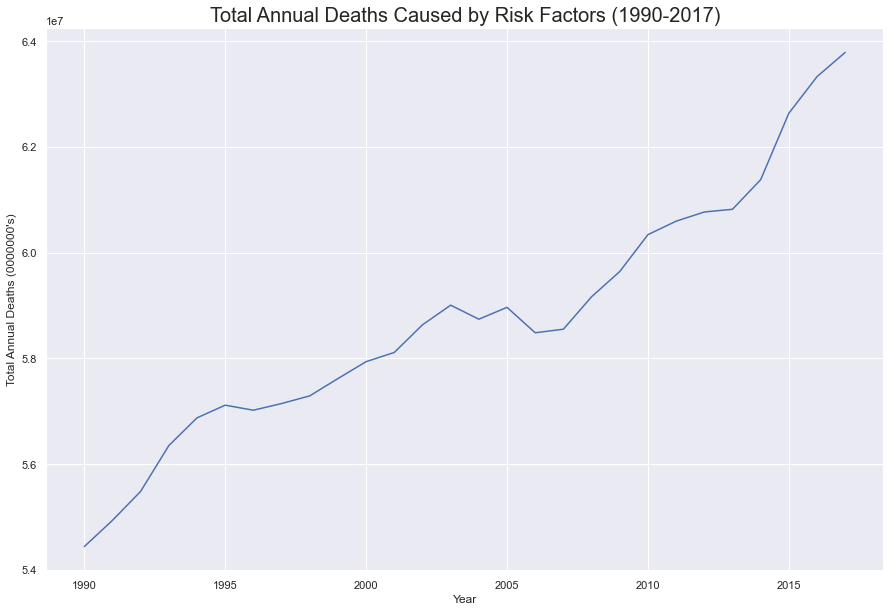

In [19]:
# Create a new column of the total deaths per year
dataw['Total Deaths'] = dataw[dataw.columns.difference(['Year'])].sum(axis=1)

# Set plot size and theme
plt.figure(figsize=(15, 10))
sn.set_theme(style="darkgrid")
# Line plot of total annual deaths
sn.lineplot(x='Year', y='Total Deaths', data=dataw)
# Add title
plt.title('Total Annual Deaths Caused by Risk Factors (1990-2017)', fontsize=20)
# Change name of y-axis
plt.ylabel('Total Annual Deaths (0000000\'s)')

There is an increasing trend in the total annual deaths, but that may just be due to ever-growing world population, so I need to calculate the death rate per 1000 people to see the actual trend.

In [20]:
# Add a world population column to gp_year with the values from the wpop table
dataw['World Population'] = wpop['World Population'].values
dataw.head()

,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,...,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds,Total Deaths,World Population
6356,1990,2111659.077,1638021.199,1239519.421,2708904.820,514102.3516,34850.39553,3365308.624,1.001277e+06,1976612.538,...,125242.9483,986994.9962,152126.9382,4693071.312,2143845.13,2222475.141,2151022.727,1409270.218,5.443930e+07,5280046096
6357,1991,2095066.505,1622958.940,1230318.626,2677805.722,502180.0259,33853.61620,3296648.253,9.758027e+05,1960013.069,...,123752.2323,971721.1216,155500.3615,4720094.144,2204256.45,2252610.545,2185116.265,1429384.206,5.493570e+07,5368139468
6358,1992,2053362.286,1588275.164,1209423.879,2648544.390,481844.5346,32221.54775,3203517.655,9.463600e+05,1941448.918,...,124721.5959,950555.6553,159199.6344,4745836.577,2260754.70,2292060.318,2234234.521,1458515.367,5.548400e+07,5452576447
6359,1993,2013224.699,1553936.146,1188248.169,2604092.494,462904.1330,30647.96698,3115719.489,9.189466e+05,1916294.891,...,121526.6645,931671.8768,163634.9343,4768144.772,2327997.81,2315164.710,2312937.055,1508398.818,5.634957e+07,5537885552
6360,1994,1973406.044,1519967.074,1167209.347,2563321.579,445422.5075,29178.11928,3039123.021,8.940853e+05,1881590.107,...,119260.7228,914227.2521,167304.1564,4773589.913,2374627.04,2319321.178,2366171.187,1538154.126,5.687446e+07,5622085788


Text(0, 0.5, 'Death Rate')

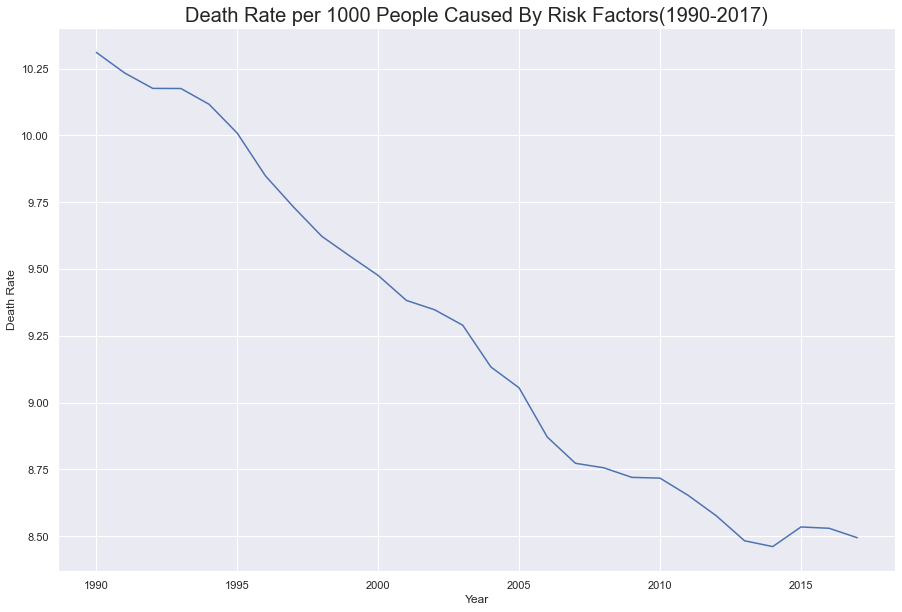

In [21]:
# Create a column that calculates the death rate per 1000 people
dataw['Death Rate'] = (dataw['Total Deaths']/dataw['World Population'])*1000

# Set plot size
plt.figure(figsize=(15, 10))
# Line plot of the death rate per 1000 people   
sn.lineplot(x='Year', y='Death Rate', data=dataw)
# Add title
plt.title('Death Rate per 1000 People Caused By Risk Factors(1990-2017)', fontsize=20)
# Change name of y-axis
plt.ylabel('Death Rate')

In [22]:
# Create a table of total deaths caused by each risk factor 
risk_totals = dataw[dataw.columns.difference(['Year', 'Total Deaths', 'World Population', 'Death Rate'])].sum(axis=0)
dataw2 = pd.DataFrame(risk_totals, columns=['Total Deaths per Risk Factor'])
dataw2['Risk Factors'] = dataw2.index
dataw2.reset_index(drop=True, inplace=True)
# Rearrange order of columns
colnames = ['Risk Factors', 'Total Deaths per Risk Factor']
dataw2 = dataw2.reindex(columns=colnames)

Text(0.5, 0, "Total Deaths (00000000's)")

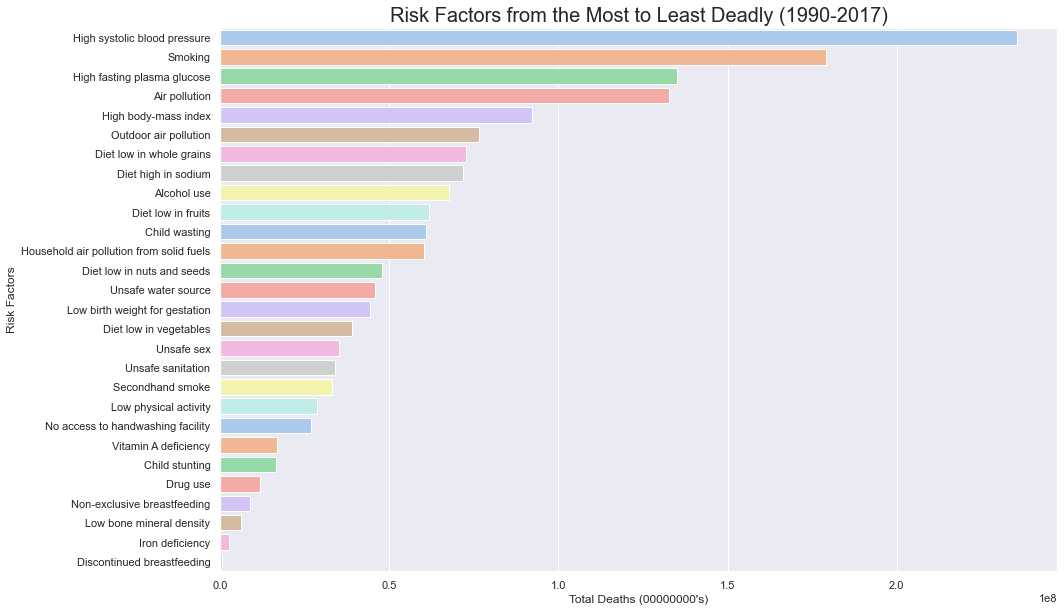

In [23]:
# Create a bar graph of the top 5 deadliest risk factors
temp = dataw2.sort_values(by='Total Deaths per Risk Factor', ascending=False)
plt.figure(figsize=(15, 10))
sn.barplot(x='Total Deaths per Risk Factor', y='Risk Factors', data=temp, palette='pastel')
plt.title('Risk Factors from the Most to Least Deadly (1990-2017)', fontsize=20)
plt.xlabel('Total Deaths (00000000\'s)')

<h5>Data Cleaning & Pre-processing for Ranking of Death Rate by Country</h5>

In [24]:
# Create another copy of the data table pertaining to the year 2017
data17 = data.loc[data['Year']==2017].copy()
# Create a new column of the total deaths per country and year
data17['Total Deaths 2017'] = data17[data17.columns.difference(['Entity','Year'])].sum(axis=1)
# Make the Entity column the index
data17.set_index('Entity', inplace=True)

# Create another copy of the pop table
pop17 = pop.copy()
# Select only the population data for 2017
pop17 = pop17[['Country Name', '2017']]
# Make the Country Name column the index
pop17.set_index('Country Name', inplace=True)

# Join gpc17 and pop17 tables
j17 = data17.join(pop17, on=data17.index)
# Check which entities has a null population value
j17.loc[j17['2017'].isna()]

,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,...,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds,Total Deaths 2017,2017
Entity,,,,,,,,,,,,,,,,,,,,,
Andean Latin America,2017,1257.987062,733.649228,1578.129626,5773.892670,344.102079,20.477721,3615.348894,378.880233,5353.829392,...,260.807990,304.264663,1375.106941,1.768615e+04,12011.09,9.758082e+03,1.096710e+04,8049.419977,2.441668e+05,NaN
Australasia,2017,38.053193,8.210255,69.430221,48.232826,7.627928,0.829651,122.157828,1.798371,443.185781,...,2.352081,0.318961,1970.902997,5.580862e+03,5569.51,3.773942e+03,8.216900e+03,5721.381348,1.672954e+05,NaN
Bahamas,2017,2.707797,0.569713,4.704793,6.969121,1.033646,0.043893,6.130670,0.340492,13.465984,...,0.959798,0.211855,7.750606,1.118949e+02,105.46,5.272114e+01,1.439464e+02,83.823742,2.433255e+03,NaN
Brunei,2017,0.417957,0.092768,1.128641,0.410656,0.530086,0.015172,2.568154,0.325613,13.307738,...,0.576829,0.077956,7.700281,5.243961e+01,52.22,1.387047e+02,1.063741e+02,75.781168,1.914220e+03,NaN
Cape Verde,2017,24.149524,15.545555,42.072321,111.448135,2.512467,0.117208,18.181877,1.561013,78.274053,...,1.293211,0.145327,8.365383,2.299308e+02,119.90,6.635465e+01,1.186240e+02,96.855008,2.800356e+03,NaN
Caribbean,2017,3962.418692,2664.382827,3221.147791,8990.182184,1314.899378,97.738630,5056.871253,628.569270,5961.447032,...,475.633204,991.761447,2036.215207,2.309470e+04,14270.84,6.177784e+03,2.073656e+04,15506.754540,3.808492e+05,NaN
Central Asia,2017,1524.572332,1423.545828,1137.813876,14640.095700,1898.442170,61.593999,8433.908724,1670.461373,12290.531880,...,141.589875,955.742567,867.549859,5.323574e+04,39028.08,4.548917e+04,7.389270e+04,47179.657080,9.509995e+05,NaN
Central Europe,2017,284.640713,86.243601,214.503268,16198.668730,105.657068,3.966697,586.134317,49.567581,1874.444455,...,17.181688,60.384277,6301.198413,8.586749e+04,70688.75,8.926637e+04,9.808456e+04,73724.133220,1.815851e+06,NaN
"Central Europe, Eastern Europe, and Central Asia",2017,2035.799408,1686.149991,2062.038854,36063.235480,2202.531913,75.090355,9968.967993,1818.594775,18029.630660,...,216.788068,1030.006610,13580.670440,3.036425e+05,269942.23,2.868744e+05,4.568369e+05,335630.733900,6.863902e+06,NaN


It seems that some entities or countries are named differently in the two tables

In [25]:
# Get names of countries in the pop table
pop['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Alge

In [26]:
# Select the countries we want, which means we only include what are officially considered a country
pop.loc[pop['Country Name'].isin(['Bahamas, The','Brunei Darussalam','Cabo Verde','Congo, Rep.','Congo, Dem. Rep.','Czech Republic','Egypt, Arab Rep.',
        'Gambia, The','Iran, Islamic Rep.','Kyrgyz Republic','Lao PDR','Micronesia, Fed. Sts.',"Korea, Dem. People's Rep.",'Korea, Rep.',
        'Russian Federation','St. Lucia','St. Vincent and the Grenadines','Slovak Republic','Syrian Arab Republic','Timor-Leste','Venezuela, RB',
        'Yemen, Rep.'])][['Country Name','2017']]
# Note: it seems that the pop table has no entry referring to Taiwan. www.macrotrends.net says Taiwan has a population of 23,674,546 in 2017.

,Country Name,2017
23,"Bahamas, The",381749.0
31,Brunei Darussalam,424481.0
43,"Congo, Dem. Rep.",81398765.0
44,"Congo, Rep.",5110701.0
47,Cabo Verde,537499.0
54,Czech Republic,10594438.0
67,"Egypt, Arab Rep.",96442590.0
79,"Micronesia, Fed. Sts.",111461.0
86,"Gambia, The",2213900.0
112,"Iran, Islamic Rep.",80673888.0


In [27]:
# Dictionary of values to replace missing values
values = {'Bahamas':381749.0,'Brunei':424481.0,'Cape Verde':537499.0,'Czechia':10594438.0,'Congo':5110701.0,'Democratic Republic of Congo':81398765.0,
         'Egypt':96442590.0,'Micronesia (country)':111461.0,'Gambia':2213900.0,'Iran':80673888.0,'Kyrgyzstan':6198200.0,'South Korea':51361911.0,
         'North Korea':25429816.0,'Laos':6953031.0,'Saint Lucia':180955.0,'Saint Vincent and the Grenadines':109826.0, 'Russia':144496739.0,
         'Slovakia':5439232.0,'Syria':17095669.0,'Taiwan':23674546.0,'Timor':1243260.0,'Venezuela':29402480.0,'Yemen':27834811.0}
# Fill missing values
j17['2017'].fillna(values,axis=0,inplace=True)
# Drop remaining rows with missing values
j17.dropna(inplace=True)

Data pre-processing done!

In [28]:
# Create a new column for death rate per 1000 people
j17['Death Rate'] = (j17['Total Deaths 2017']/j17['2017'])*1000
# Make the row index of the j17 table into a column
j17['Country'] = j17.index
j17.reset_index(drop=True, inplace=True)
# Make the last column be the first column
cols = list(j17.columns)
cols = [cols[-1]] + cols[:-1]
j17 = j17[cols]

Text(0.5, 0, 'Death Rate')

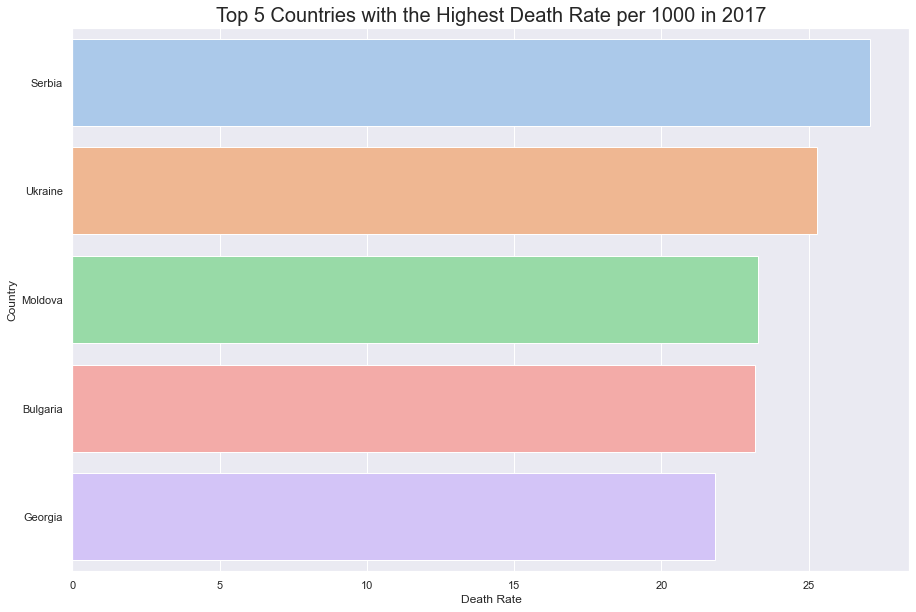

In [29]:
# Make a bar graph of the top 5 countries with teh highest death rate
temp = j17.sort_values(by='Death Rate', ascending=False).head()
plt.figure(figsize=(15, 10))
sn.barplot(x='Death Rate', y='Country', data=temp, palette='pastel')
plt.title('Top 5 Countries with the Highest Death Rate per 1000 in 2017', fontsize=20)
plt.xlabel('Death Rate')

Text(0.5, 0, 'Death Rate')

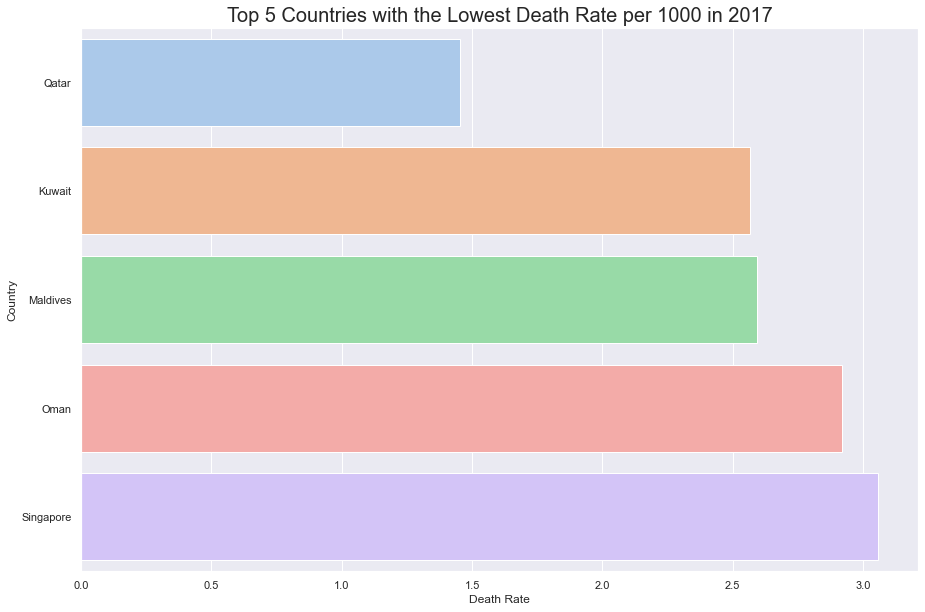

In [30]:
# Make a bar graph of the top 5 countries with teh highest death rate
temp = j17.sort_values(by='Death Rate').head()
plt.figure(figsize=(15, 10))
sn.barplot(x='Death Rate', y='Country', data=temp, palette='pastel')
plt.title('Top 5 Countries with the Lowest Death Rate per 1000 in 2017', fontsize=20)
plt.xlabel('Death Rate')